# Purpose
Here, we intend to verify that all of the probability density functions are correct and match the distributions produced by the samplers.

# Importing Modules

In [1]:
from copy import copy
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import TAZ

In [2]:
%matplotlib widget

# Level-Spacing Distributions

### Wigner Distribution

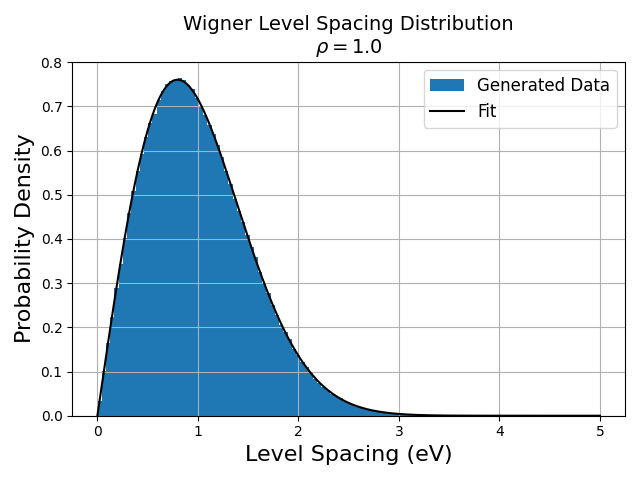

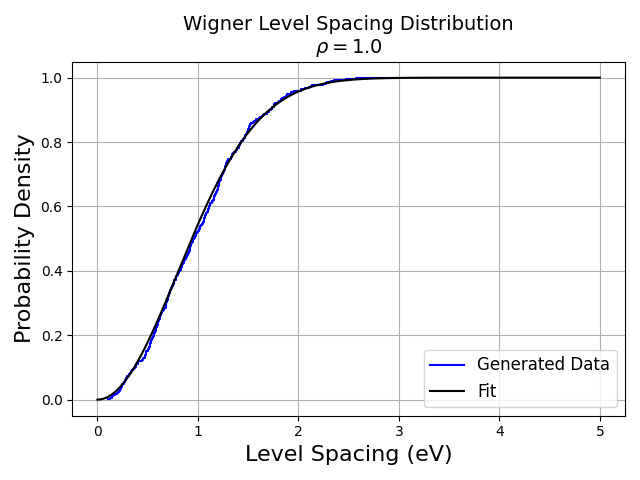

In [3]:
xMax = 5.0

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron
# Mean Parameters:
EB = (1e-5,1e6)
lvl_dens  = [1.0]
gn2m  = [44.11355]
gg2m   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]


SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = reaction.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = level_spacings[level_spacings <= xMax]


L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)
PDF = reaction.fit('level spacing', 0)(X)
CDF = reaction.fit('level spacing', 0, cdf=True)(X)

# PDF:
plt.figure(1)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, PDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Wigner Level Spacing Distribution\n'+rf'$\rho = {lvl_dens[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# CDF:
level_spacings_less = level_spacings[:500]
plt.figure(2)
plt.clf()
TAZ.analysis.ecdf(level_spacings_less, color='b', label='Generated Data')
plt.plot(X, CDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Wigner Level Spacing Distribution\n'+rf'$\rho = {lvl_dens[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Brody Distribution

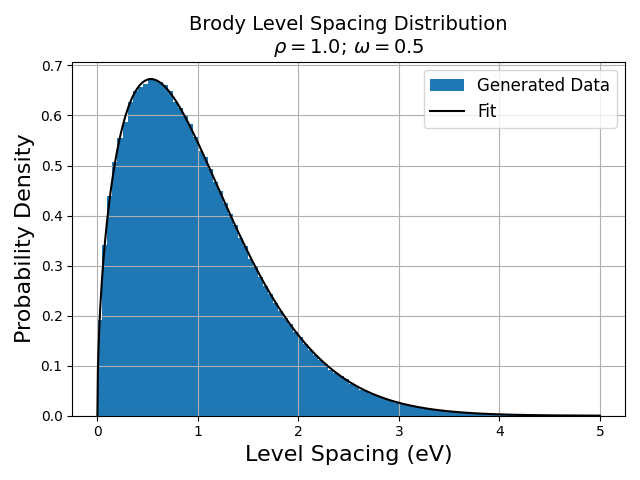

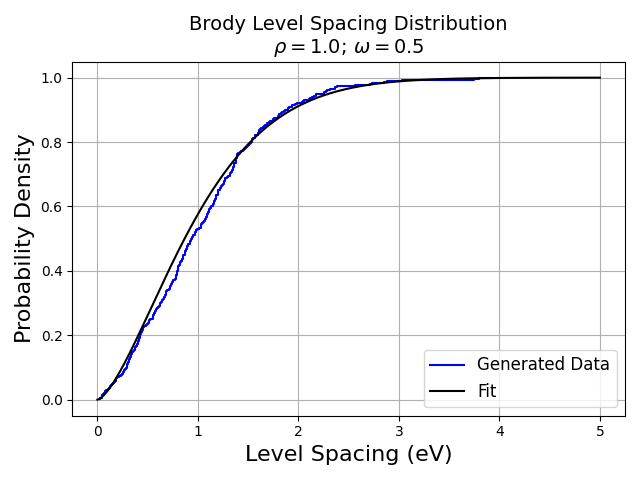

In [4]:
xMax = 5.0

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron
# Mean Parameters:
EB = (1e-5,1e6)
lvl_dens  = [1.0]
brody_param = [0.5]
gn2m  = [44.11355]
gg2m   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]


SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, brody_param=brody_param, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = reaction.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = level_spacings[level_spacings <= xMax]


L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)
PDF = reaction.fit('level spacing', 0)(X)
CDF = reaction.fit('level spacing', 0, cdf=True)(X)


plt.figure(3)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, PDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Brody Level Spacing Distribution\n'+rf'$\rho={lvl_dens[0]}$; $\omega={brody_param[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

level_spacings_less = level_spacings[:500]
plt.figure(4)
plt.clf()
TAZ.analysis.ecdf(level_spacings_less, color='b', label='Generated Data')
plt.plot(X, CDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Brody Level Spacing Distribution\n'+rf'$\rho={lvl_dens[0]}$; $\omega={brody_param[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Merging Distribution

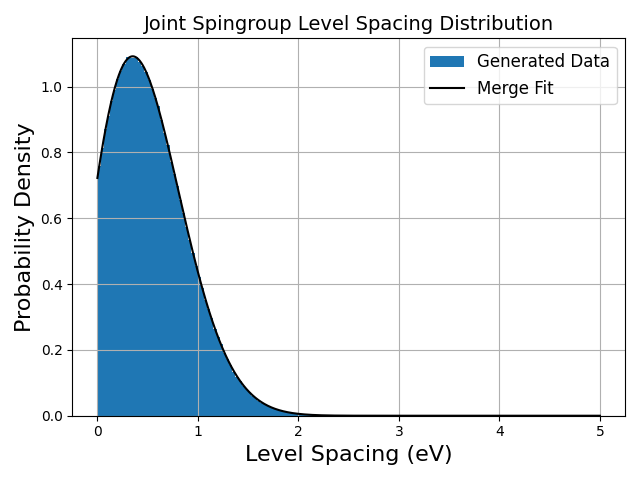

In [5]:
xMax = 5.0

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron
# Mean Parameters:
EB = (1e-5,1e6)
lvl_dens  = [1.3, 0.5]
gn2m  = [44.11355, 33.38697]
gg2m   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = reaction.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = np.sort(level_spacings)
level_spacings = level_spacings[level_spacings <= xMax]


L_fit = 1000
N_fit = len(lvl_dens)
prior = np.array(lvl_dens).reshape(1,-1) * np.ones((L_fit, N_fit)) / np.sum(lvl_dens)
X = np.linspace(0.0, xMax, L_fit)

level_spacing_dists = reaction.distributions('Wigner')
merged_dist = TAZ.Theory.merge(*level_spacing_dists)
P = merged_dist.f0(X, prior, prior)


plt.figure(5)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Merge Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Joint Spingroup Level Spacing Distribution', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Missing Resonances Distribution

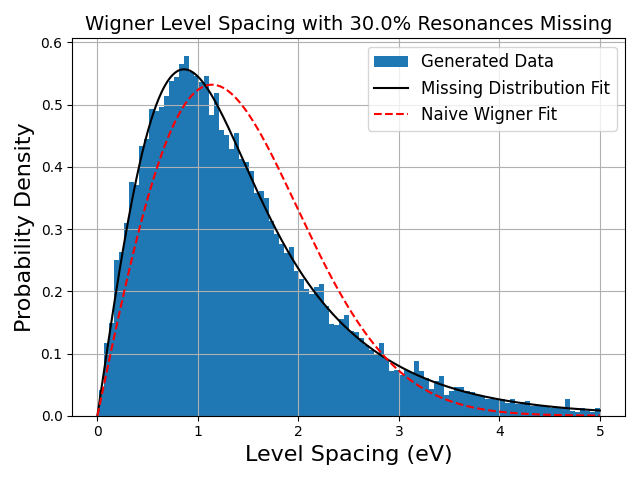

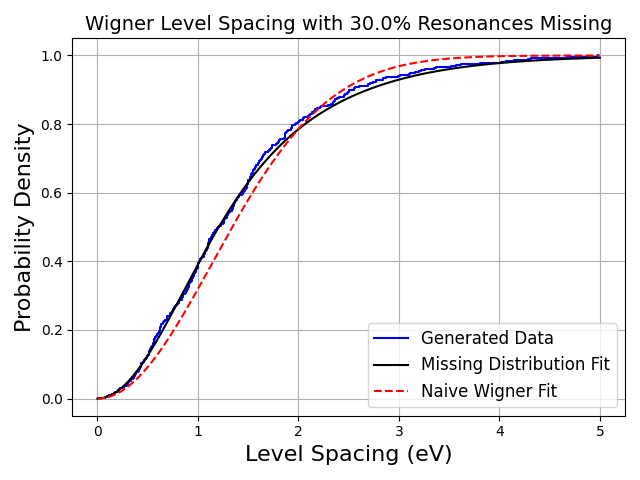

In [6]:
xMax = 5.0

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron
# Mean Parameters:
EB = (1e-5,2e4)
pM = [0.3]
lvl_dens  = [1.0]
gn2m  = [1.0]
gg2m   = [1.0]
dfn   = [1]
dfg   = [250]
l     = [0,]
j     = [3.0]


SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB, MissFrac=pM)
Res, Types, Missed_Res, Missed_Types = reaction.sample('GOE')

level_spacings_missing = np.diff(Res.E)
level_spacings_missing = level_spacings_missing[level_spacings_missing <= xMax]


L_fit = 1000
N_fit = len(lvl_dens)
Prior = np.ones((L_fit, N_fit))#*np.array(lvl_dens).reshape(1,-1)/(np.sum(lvl_dens))
X_missing = np.linspace(0.0, xMax, L_fit)
PDF_missing = reaction.fit('level spacing', 0)(X_missing)
CDF_missing = reaction.fit('level spacing', 0, cdf=True)(X_missing)

reaction2 = copy(reaction)
reaction2.lvl_dens = reaction.lvl_dens*(1-reaction.MissFrac)
reaction2.MissFrac = np.zeros((1,))
PDF_wigner = reaction2.fit('level spacing', 0)(X_missing)
CDF_wigner = reaction2.fit('level spacing', 0, cdf=True)(X_missing)


# PDF:
plt.figure(6)
plt.clf()
plt.hist(level_spacings_missing, 100, density=True, label='Generated Data')
plt.plot(X_missing, PDF_missing, '-k', label='Missing Distribution Fit')
plt.plot(X_missing, PDF_wigner, '--r', label='Naive Wigner Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title(f'Wigner Level Spacing with {pM[0]:.1%} Resonances Missing', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# CDF:
level_spacings_missing_less = level_spacings_missing[:500]
plt.figure(7)
plt.clf()
TAZ.analysis.ecdf(level_spacings_missing_less, color='b', label='Generated Data')
plt.plot(X_missing, CDF_missing, '-k', label='Missing Distribution Fit')
plt.plot(X_missing, CDF_wigner, '--r', label='Naive Wigner Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title(f'Wigner Level Spacing with {pM[0]:.1%} Resonances Missing', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Level Spacing Ratio PDF

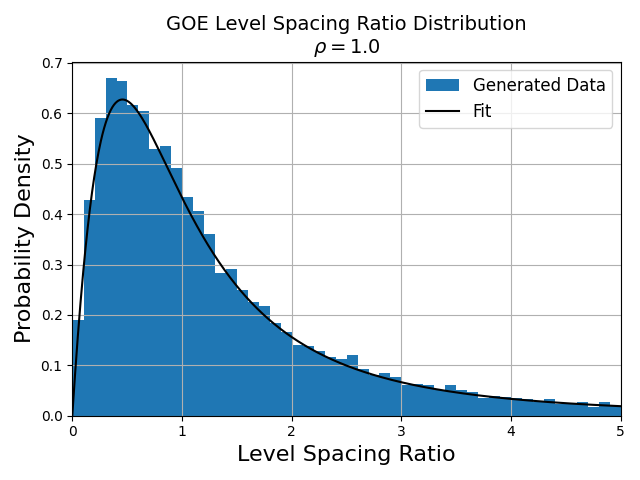

In [7]:
res_energies = TAZ.Theory.SampleEnergies(EB, lvl_dens=1.0, ensemble='GOE')
level_spacings = np.diff(res_energies)
level_spacings = level_spacings[level_spacings <= xMax]
level_spacing_ratios = level_spacings[1:]/level_spacings[:-1]
level_spacing_ratios = level_spacing_ratios[level_spacing_ratios <= xMax]


L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)
P = TAZ.Theory.lvl_spacing_ratio_dist(beta=1).pdf(X)


plt.figure(8)
plt.clf()
plt.hist(level_spacing_ratios, 50, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Fit')
plt.xlim(0, xMax)
plt.grid()
plt.xlabel('Level Spacing Ratio', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('GOE Level Spacing Ratio Distribution\n'+rf'$\rho = {lvl_dens[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Higher-Order Level-Spacing Distributions
The nth-order level-spacing is the distance between n-th removed nearest resonances. Higher-order level-spacing distribution equations come from the following journal article:

Source: https://journals.aps.org/pre/pdf/10.1103/PhysRevE.60.5371

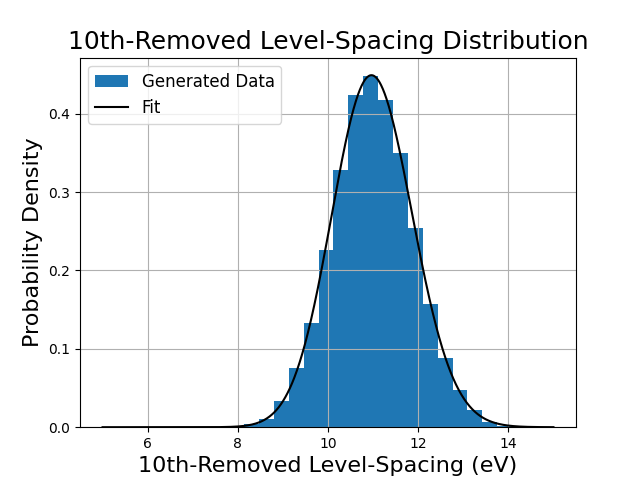

In [8]:
n = 10


nth_level_spacings = res_energies[(n+1):] - res_energies[:-(n+1)]

X = np.linspace(n-5, n+5, 1000)
P = TAZ.Theory.HighOrderSpacingGen(n=n).pdf(X)


plt.figure(9)
plt.clf()
plt.hist(nth_level_spacings, bins=20, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Fit')
plt.grid()
plt.title(f'{n}th-Removed Level-Spacing Distribution', fontsize=18)
plt.xlabel(f'{n}th-Removed Level-Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.legend(fontsize=12)
plt.show()

# Width Distributions

## Neutron Width Distribution

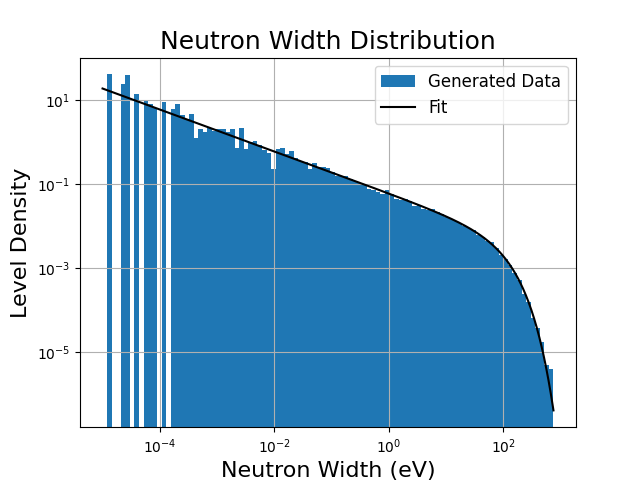

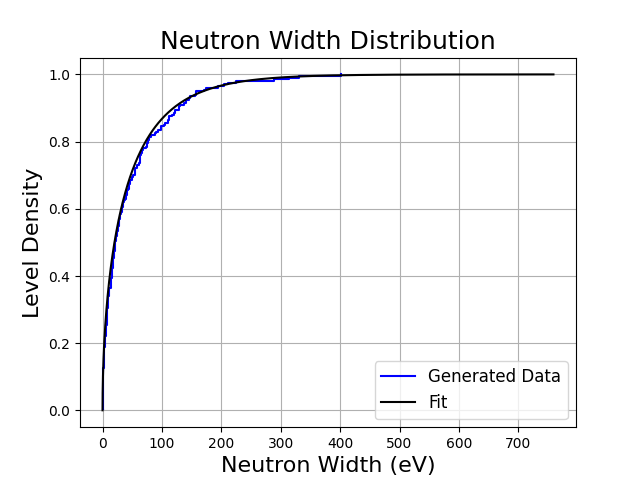

In [9]:
xMin = 1e-5

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron
# Mean Parameters:
EB = (1e-5,1e4)
lvl_dens  = [1.0]
gn2m  = [44.11355]
gg2m   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]


SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = reaction.sample('NNE')

Gn = copy(Res.Gn)
rGn = Gn * TAZ.Theory.ReduceFactor(Res.E, l[0], ac=reaction.ac, mass_targ=reaction.targ.mass, mass_proj=reaction.proj.mass)

G = np.exp(np.linspace(np.log(xMin), np.log(np.max(rGn)), 1000))
PDF = reaction.fit('neutron width', 0)(G)

G = np.exp(np.linspace(np.log(xMin), np.log(np.max(rGn)), 1000))
CDF = reaction.fit('neutron width', 0, cdf=True)(G)


# PDF:
bins = np.exp( np.linspace(np.log(xMin), np.log(np.max(rGn)), 100) )
plt.figure(10)
plt.clf()
plt.hist(rGn, bins=bins, density=True, label='Generated Data')
plt.plot(G, PDF, '-k', label='Fit')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.title('Neutron Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.legend(fontsize=12)
plt.show()


# CDF:
rGn_less = rGn[:200]
plt.figure(11)
plt.clf()
TAZ.analysis.ecdf(rGn_less, color='b', label='Generated Data')
plt.plot(G, CDF, '-k', label='Fit')
plt.grid()
plt.title('Neutron Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.legend(fontsize=12)
plt.show()

### With Truncation

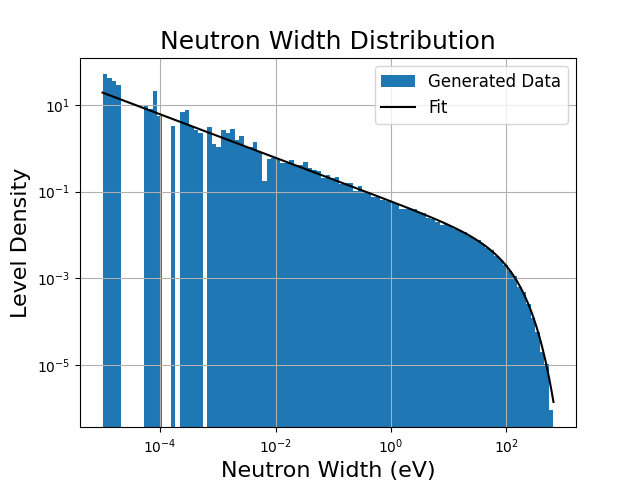

In [10]:
xMin = 1e-5

# Particle Types:
Target = TAZ.Particle(Z=73, A=181, I=7/2, mass=180.9479958, name='Ta-181')
Projectile = TAZ.Neutron
# Mean Parameters:
EB = (1e-5,1e4)
lvl_dens  = [1.0]
gn2m  = [44.11355]
gg2m   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]
trunc = [0.1]

SGs = TAZ.Spingroup.zip(l, j)
reaction = TAZ.Reaction(targ=Target, proj=Projectile, lvl_dens=lvl_dens, gn2m=gn2m, nDOF=dfn, gg2m=gg2m, gDOF=dfg, spingroups=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = reaction.sample('NNE')
rGn = Res.Gn * TAZ.Theory.ReduceFactor(Res.E, reaction.L[0], ac=reaction.ac, mass_targ=reaction.targ.mass, mass_proj=reaction.proj.mass)
rGn.sort()

G = np.exp(np.linspace(np.log(xMin), np.log(rGn[-1]), 1000))
P = reaction.fit('neutron width', 0)(G)

bins = np.exp( np.linspace(np.log(xMin), np.log(rGn[-1]), 100) )
plt.figure(12)
plt.clf()
plt.hist(rGn, bins=bins, density=True, label='Generated Data')
plt.plot(G, P, '-k', label='Fit')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.title('Neutron Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.legend(fontsize=12)
plt.show()

## Gamma (Capture) Widths

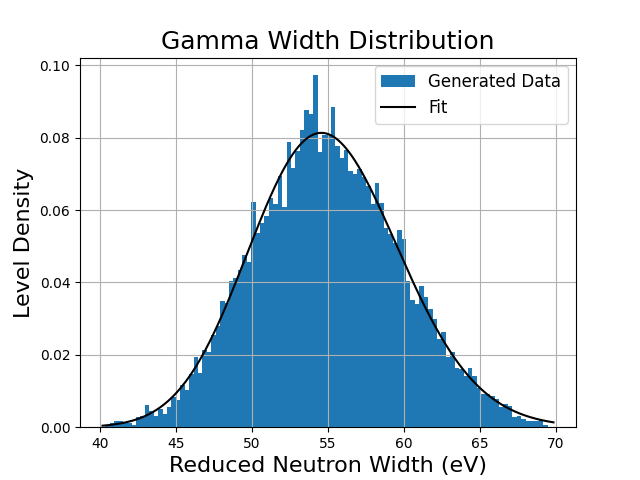

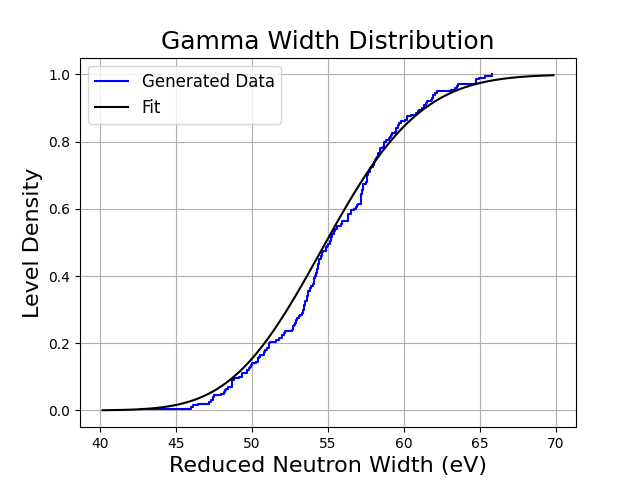

In [19]:
xMin = gg2m[0] - 2*np.sqrt(gg2m[0])
xMax = gg2m[0] + 2*np.sqrt(gg2m[0])


GG2 = np.linspace(xMin, xMax, 1000)
PDF = reaction.fit('gamma width', 0)(GG2)
CDF = reaction.fit('gamma width', 0, cdf=True)(GG2)

Gg = Res.Gg
gg2 = Gg / 2
gg2 = gg2[gg2 <= xMax]
gg2 = gg2[gg2 >= xMin]

plt.figure(13)
plt.clf()
plt.hist(gg2, bins=100, density=True, label='Generated Data')
plt.plot(GG2, PDF, '-k', label='Fit')
plt.grid()
plt.title('Gamma Width Distribution', fontsize=18)
plt.xlabel('Reduced Neutron Width (eV)', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.legend(fontsize=12)
plt.show()

gg2_less = gg2[:200]
plt.figure(14)
plt.clf()
TAZ.analysis.ecdf(gg2_less, color='b', label='Generated Data')
# plt.hist(rGn, bins=bins, density=True, log=True, label='Generated Data')
plt.plot(GG2, CDF, '-k', label='Fit')
plt.grid()
plt.title('Gamma Width Distribution', fontsize=18)
plt.xlabel('Reduced Neutron Width (eV)', fontsize=16)
plt.ylabel('Level Density', fontsize=16)
plt.legend(fontsize=12)
plt.show()